In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
##### Vectorized forward euler
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points in time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 23/10/2019
def f_euler(F, ts, y0, p = 0):
    ys = [y0]
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(tnext, ys[-1], p)*h
        ys.append(ynext)
        t = tnext
    return np.array(ys)

## O metódo de Euler

É um metódo númerico para resolvermos equações diferenciais, podendo ser explícito ou implícito, o metódo de Euler é de primeira ordem e é barato em recursos.<br>
A ideia do metódo de Euler vem de aproximarmos a solução de uma equação diferencial pela tangente da solução.
$$
\frac{\mathrm{d}x}{\mathrm{d}t} = f(t,x)
$$
Podemos aproximar $f(t)$ pela derivada, sendo $u_n$ o valor da solução no ponto $n$, podemos escrever:
$$
u_n = u_{n-1} + hf(t,x)
$$
Sendo $h$ o nosso passo no tempo

#### Visualizando o metódo explicito

Vamos olhar para a equação diferencial
$$
\begin{cases}
\frac{\mathrm{d}u}{\mathrm{d}t} = -5t+4u\\
u(0) = 0
\end{cases}
$$

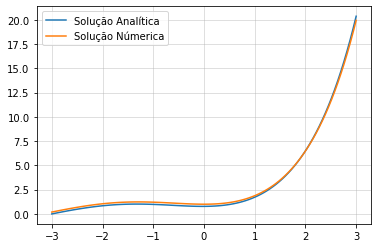

In [43]:
def eq_1(t,u, p = 0):
    return np.e**t - np.cos(t)

def sol_eq_1(t, u):
    return np.e**t - np.sin(t)
ts = np.linspace(-3,3,100)
us = sol_eq_1(ts, 0)
    
ys = f_euler(eq_1, ts, 0)
plt.plot(ts, ys, label = 'Solução Analítica')
plt.plot(ts, us, label = 'Solução Númerica')
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

Podemos resolver uma equação diferencial de grau maior que $1$ com o metódo de euler, para tanto basta montarmos um sistema de equações diferenciais de 1ª ordem e utilizar o metódo em cada uma.<br>
Considere a equação diferencial de 2ª ordem:
$$
\frac{\mathrm{d^2}u}{\mathrm{d}t^2} = -5t
$$

Se fizermos a troca de variáveis: $$\frac{\mathrm{d}u}{\mathrm{d}t} = x \\ \frac{\mathrm{d}x}{\mathrm{d}t} = v $$ Temos que $v = -5t$

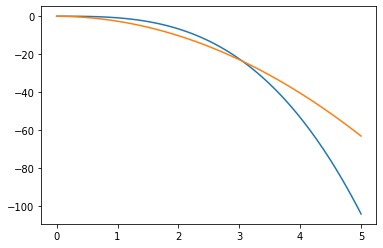

In [88]:
def v_eq_1(t, u, p = 0):
    return np.array([u[1], -5*t])

ts = np.linspace(0,5,100)
ys = f_euler(v_eq_1, ts, [0,0])

plt.plot(ts, ys)
plt.show()

### Backward Euler

In [86]:
##### Vectorized backward euler
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points in time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 26/10/2019
def mylib_beuler(F, ts, y0, p = 0):
    ys = [y0]
    t = ts[0]
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        y = ys[-1]
        ynext = y + mylib_beuler_step(F,t,y,h)
        ys.append(ynext)
        t = tnext
    return np.array(ys)

def mylib_beuler_step(F, t, y, h, tol = 1e-6):
    tnext = t+h
    fw_step = F(t, y) * h
    def f(step): return step - F(tnext, y+step)*h
    step = bissection(f, 0, 2*fw_step, tol)
    return step

# ---------------------------------------------------------------------------- #

##### Bissection
### Input:  f -> Equation for the root to be found;
###         a -> min of the interval;
###         b -> max of the interval;
###         tol -> tolerance;
### Output: z -> f(z) < tol (root)
##### Gil Miranda - last revision 26/10/2019
def bissection(f, a, b, tol = 1e-6):
    z = a/2+b/2 # (a+b)/2 without errors if they are big
    if b - a < tol:
        return z
    if f(a)*f(z) < 0:
        return bissection(f, a, z, tol)
    else:
        return bissection(f, z, b, tol)

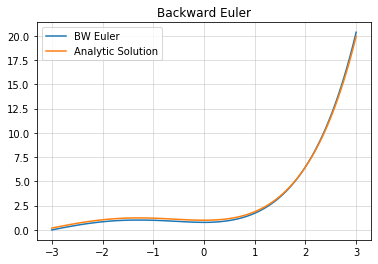

In [87]:
ys_im = mylib_beuler(eq_1, ts, 0)

plt.plot(ts, ys_im, label = 'BW Euler')
plt.plot(ts, us, label = 'Analytic Solution')
plt.title('Backward Euler')
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

In [90]:
vec_ys_im = mylib_beuler(v_eq_1, ts, [0,0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()